### 4.10 Part 1.25 Mature Regular Customer
#### 1 - importing libraries
#### 2 - Importing df
#### 3 - Analyzing  by Frequent Flag
#### 4 - Analyzing Purshases by Income
#### 5 - Analyzing by Busiest_day
#### 6 - Analyzing number by State
#### 7 - Analyzing by n_dependants
#### 8 - Analyzing Days since prior order
#### 9 - Defining TOP products for client group

### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

### 2 Importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','0MRC.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag'],
      dtype='object')

In [5]:
df.shape

(10441258, 30)

In [6]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,1.044126e+07,1.044126e+07,1.044126e+07,1.044126e+07,1.044126e+07,1.044126e+07
mean,1.026214e+05,6.098824e+01,1.164178e+05,2.545804e+04,1.182530e+01,1.260806e+01
std,5.937793e+04,1.186152e+01,4.254840e+04,1.419403e+04,8.225399e+00,8.749585e+01
min,2.000000e+00,4.100000e+01,2.900100e+04,0.000000e+00,1.000000e+00,1.300000e+00
25%,5.138400e+04,5.100000e+01,9.610800e+04,1.325500e+04,5.000000e+00,7.408152e+00
50%,1.020610e+05,6.100000e+01,1.165780e+05,2.514600e+04,1.000000e+01,7.841584e+00
75%,1.540770e+05,7.100000e+01,1.437140e+05,3.782500e+04,1.700000e+01,8.272358e+00
max,2.062090e+05,8.100000e+01,5.924090e+05,4.968800e+04,4.000000e+01,1.500694e+04


### 3 -Analyzing MRC by Frequent Flag

#### --creating the subset to avoid Memory Error

In [7]:
df1=df[['user_id','fam_status','frequent_flag']]

In [8]:
df11=df1.drop_duplicates().reset_index()

In [10]:
df11

,index,user_id,fam_status,frequent_flag
0,157,69965,married,Non-frequent customer
1,550,37744,married,Frequent customer
2,594,57549,divorced/widowed,Regular customer
3,731,86936,married,Frequent customer
4,881,104359,married,Regular customer
...,...,...,...,...
53749,674845,20790,single,Regular customer
53750,1159554,87503,married,Regular customer
53751,1968892,131221,divorced/widowed,Non-frequent customer
53752,4129831,204400,married,Regular customer


#### -analyzing YNC by Frequent_flag and Family Status based on customers number

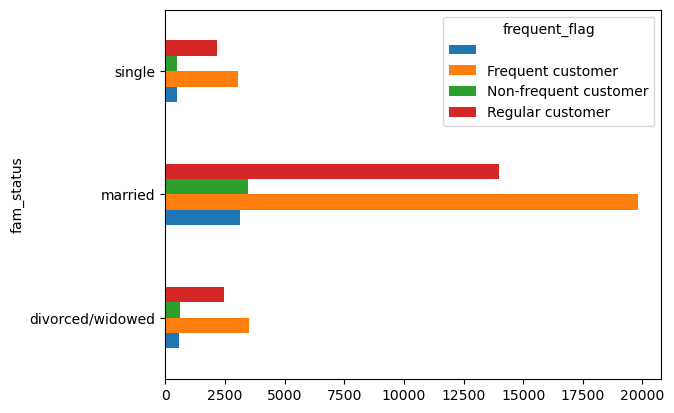

In [11]:
bar12=df11.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [12]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MRC_LoyaltyFlag.png'))

In [13]:
df11.groupby('fam_status')['frequent_flag'].value_counts()

fam_status        frequent_flag        
divorced/widowed  Frequent customer         3494
                  Regular customer          2477
                  Non-frequent customer      618
                                             576
married           Frequent customer        19805
                  Regular customer         14005
                  Non-frequent customer     3483
                                            3133
single            Frequent customer         3035
                  Regular customer          2157
                  Non-frequent customer      504
                                             467
Name: frequent_flag, dtype: int64

### -analyzing MRC by Frequent flag and Family Status based on purchase number

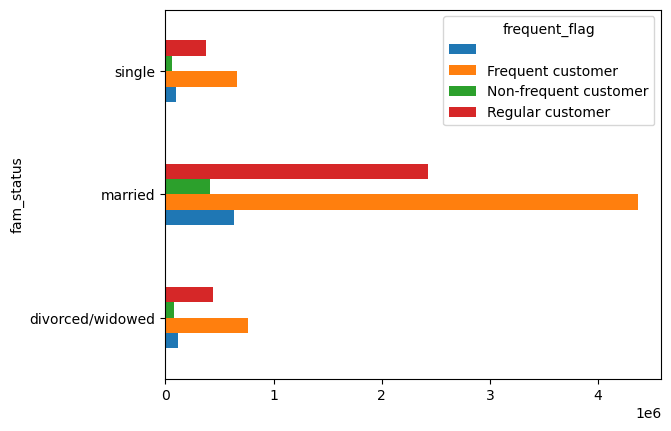

In [14]:
bar12=df1.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [15]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MRC_LoyaltyFlagSales.png'))

In [16]:
df11.groupby('fam_status')['frequent_flag'].value_counts()

fam_status        frequent_flag        
divorced/widowed  Frequent customer         3494
                  Regular customer          2477
                  Non-frequent customer      618
                                             576
married           Frequent customer        19805
                  Regular customer         14005
                  Non-frequent customer     3483
                                            3133
single            Frequent customer         3035
                  Regular customer          2157
                  Non-frequent customer      504
                                             467
Name: frequent_flag, dtype: int64

### 4 -analyzing MRC purshases by their income

In [17]:
df2=df[['prices', 'income']]

In [18]:
df2['prices'].sum()

130961526.70000005

In [19]:
df22=df2.groupby('income').agg(mean_purshase=('prices','mean'))

In [20]:
df22

,mean_purshase
income,
29001,6.648468
29011,6.940702
29017,6.489474
29040,6.633333
29050,6.717021
...,...
578251,1414.752113
578551,173.017778
579397,105.096104


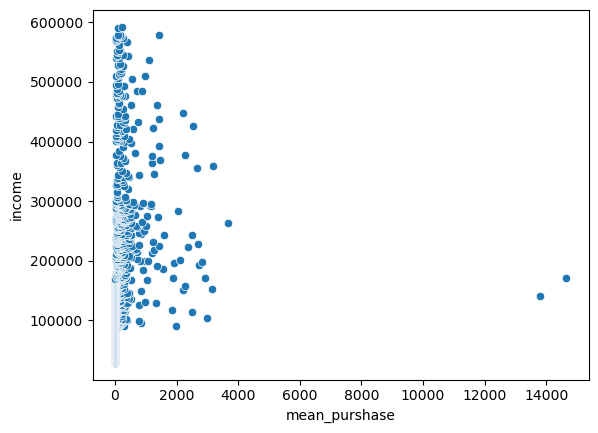

In [21]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22)

#### filter extrem big values

In [22]:
df22filtered=df22[df22['mean_purshase']<6000]

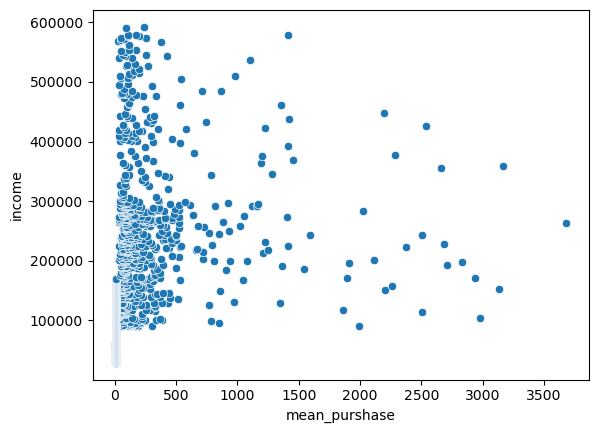

In [23]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22filtered)

In [24]:
scat3.figure.savefig(os.path.join(path, 'Prepared Data', 'MRC_PricesIncome.png'))

### 5 - Analyzing MRC by Busiest_day

In [25]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [26]:
df4

,user_id,STATE,busiest_day,day_of_week
157,69965,Texas,Busiest days,1
158,69965,Texas,Regularly days,2
159,69965,Texas,Regularly days,6
160,69965,Texas,Regularly days,6
161,69965,Texas,Regularly days,5
...,...,...,...,...
6464238,74598,Minnesota,Regularly days,2
6464239,74598,Minnesota,Busiest days,1
6464240,74598,Minnesota,Busiest days,0
6464241,74598,Minnesota,Regularly days,5


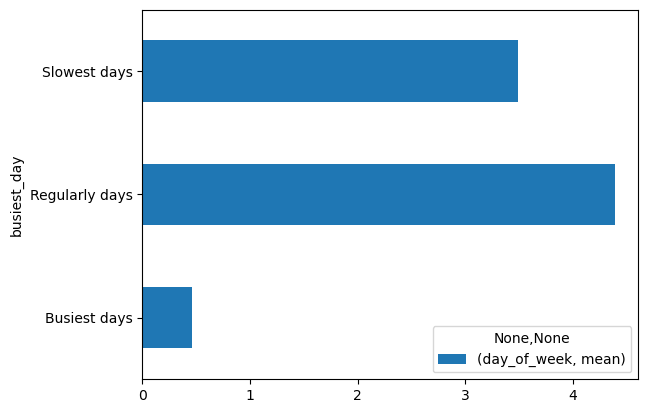

In [27]:
bar14=df4.groupby('busiest_day').agg({'day_of_week':['mean']}).plot.barh()

In [28]:
bar14.figure.savefig(os.path.join(path, 'Prepared Data', 'MRC_BusiestDayOfWeek.png'))

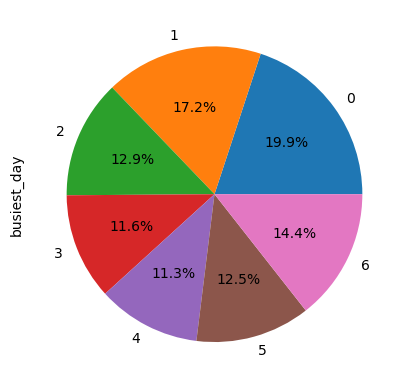

In [29]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [30]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    2082206
1    1798629
2    1352052
3    1214935
4    1178930
5    1310066
6    1504440
Name: busiest_day, dtype: int64

In [31]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'MRC_pieBusiestDayOfWeek.png'))

### -MRC prefered hour of day

In [32]:
df44=df[['order_hour_of_day','user_id']]

In [33]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      72644
1      38364
2      22778
3      17069
4      16892
5      28223
6      86671
7     269744
8     529002
9     761332
10    870602
11    877830
12    848420
13    858916
14    872281
15    864002
16    836367
17    699545
18    552299
19    416747
20    314174
21    253867
22    201731
23    131758
Name: user_id, dtype: int64

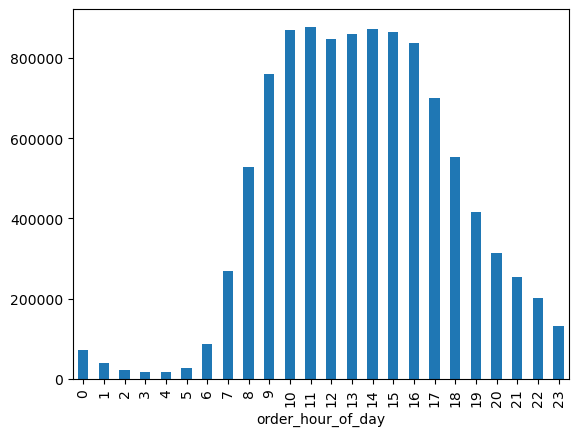

In [34]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [35]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'MRC_BusiestHourOfDay.png'))

### 6 - Analyzing number of MRC by State

In [36]:
df5=df[['user_id','STATE']]

In [37]:
DF5=df5.drop_duplicates().reset_index()

In [38]:
DF5

,index,user_id,STATE
0,157,69965,Texas
1,550,37744,Arkansas
2,594,57549,Montana
3,731,86936,Oregon
4,881,104359,Idaho
...,...,...,...
53749,674845,20790,Maryland
53750,1159554,87503,Missouri
53751,1968892,131221,West Virginia
53752,4129831,204400,Tennessee


#### number of rows indicate total number of YNC =53574

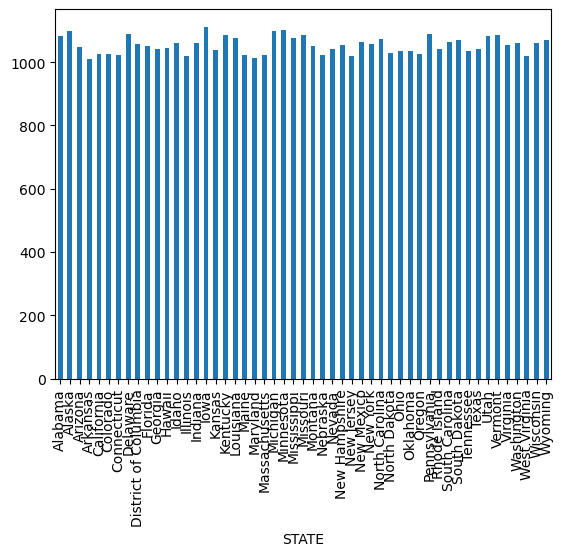

In [39]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [40]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 1084
Alaska                  1099
Arizona                 1048
Arkansas                1009
California              1025
Colorado                1026
Connecticut             1024
Delaware                1090
District of Columbia    1057
Florida                 1052
Georgia                 1042
Hawaii                  1044
Idaho                   1062
Illinois                1019
Indiana                 1060
Iowa                    1112
Kansas                  1040
Kentucky                1087
Louisiana               1075
Maine                   1023
Maryland                1012
Massachusetts           1022
Michigan                1098
Minnesota               1103
Mississippi             1075
Missouri                1085
Montana                 1051
Nebraska                1022
Nevada                  1043
New Hampshire           1053
New Jersey              1021
New Mexico              1063
New York                1056
North Carolina          1073
North Da

#### -defining 10 Top States

In [41]:
DF5.groupby('STATE')['user_id'].count().sort_values(ascending=False).head(10)

STATE
Iowa            1112
Minnesota       1103
Alaska          1099
Michigan        1098
Pennsylvania    1090
Delaware        1090
Kentucky        1087
Vermont         1086
Missouri        1085
Utah            1084
Name: user_id, dtype: int64

#### -saving the plot

In [42]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'MRC_UsersNumberState.png'))

### 7 - Analyzing MRC by n_dependants

In [43]:
df6=df[['user_id', 'n_dependants']]

In [44]:
DF6=df6.drop_duplicates()

In [45]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    13328
1    13430
2    13405
3    13591
Name: user_id, dtype: int64

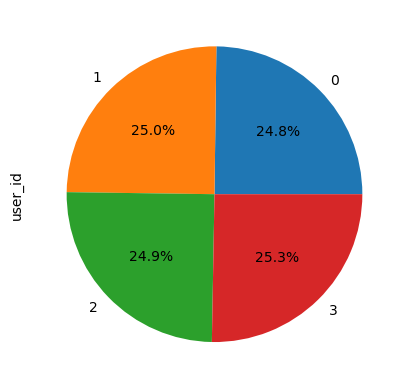

In [46]:
pie16=DF6.groupby(['n_dependants'])['user_id'].count().plot(kind='pie', autopct='%0.01f%%')

In [47]:
DF6

,user_id,n_dependants
157,69965,1
550,37744,1
594,57549,0
731,86936,3
881,104359,1
...,...,...
674845,20790,0
1159554,87503,3
1968892,131221,0
4129831,204400,2


#### saving the plot

In [48]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'MRC_NDependansUsers.png'))

### 8 - Analyzing MRC Days since prior order

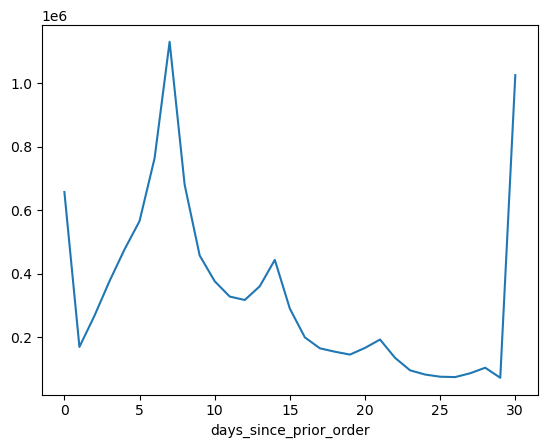

In [49]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [50]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0      657224
1      169807
2      267825
3      376591
4      476425
5      565680
6      763252
7     1129646
8      680187
9      457549
10     376490
11     328266
12     317485
13     360676
14     443657
15     290308
16     199822
17     165419
18     154771
19     145698
20     166723
21     193060
22     135456
23      96177
24      82957
25      76159
26      74953
27      87009
28     104383
29      72776
30    1024827
Name: days_since_prior_order, dtype: int64

In [51]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'MRC_DaysSincePriorOrder.png'))

### 9- Defining MRC TOP products for client group


 #### creating subset

In [52]:
df18=df[['product_name','product_id','prices']]

In [53]:
df18

,product_name,product_id,prices
157,Yellow Bell Pepper,2295,6.5
158,Organic Turkey Bacon,5646,24.2
159,Organic Lemon,5876,3.6
160,Organic Unsweetened Vanilla Almond Milk,14084,12.5
161,Powdered Peanut Butter,17304,7.6
...,...,...,...
6464238,Chicken Franks,45994,15.6
6464239,Chicken Franks,45994,15.6
6464240,Chicken Franks,45994,15.6
6464241,Chicken Franks,45994,15.6


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [59]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().head(10)

In [60]:
DF18

,product_name,prices
0,Banana,151369
1,Bag of Organic Bananas,114214
2,Organic Strawberries,77529
3,Organic Baby Spinach,76957
4,Organic Hass Avocado,64135
5,,63387
6,Organic Avocado,58889
7,Large Lemon,50692
8,Strawberries,47629
9,Limes,45188


In [55]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [61]:
DF18=DF18.drop(index=5)

In [62]:
DF18

,product_name,prices
0,Banana,151369
1,Bag of Organic Bananas,114214
2,Organic Strawberries,77529
3,Organic Baby Spinach,76957
4,Organic Hass Avocado,64135
6,Organic Avocado,58889
7,Large Lemon,50692
8,Strawberries,47629
9,Limes,45188


#### -creating plot

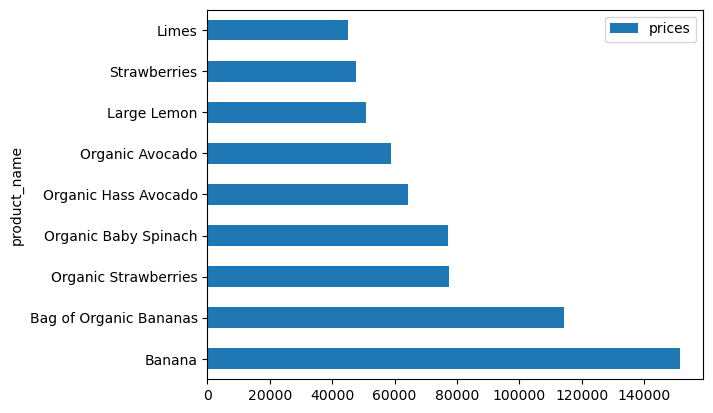

In [63]:
Bar21=DF18.plot.barh(x='product_name')

#### -saving the plot

In [64]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'MRC_Products.png'))